## **<center><font style="color:rgb(191,170,0)">Karatsuba Algorithm for Large Integer Multiplication</font> </center>**

<font style="color:rgb(0,0,0)">The Karatsuba algorithm is a fast multiplication algorithm that was developed by Anatoly Karatsuba in the 1960s. 

It is a divide and conquer algorithm that reduces the multiplication of two n-digit numbers to three multiplications of n/2-digit numbers. 

It is based on the observation that the product of two numbers can be expressed as the sum of two products of half the size, plus a correction term.

The Karatsuba algorithm has a time complexity of *`O(n^log_2 3)`*, which is faster than the traditional multiplication algorithm, which has a time complexity of **```O(n^2)```**. 

This makes it more efficient for large numbers and has made it a popular choice for implementing multiplication in computer software. 

It is also used as a building block for more efficient multiplication algorithms, such as the **```Toom-Cook```** algorithm and the **```Schönhage-Strassen```** algorithm. </font>

### **<font style="color:rgb(191,170,0)">Why we need karatsuba Algorithm?</font>**

<font style="color:rgb(0,0,0)">1. The conventional method used to multiply two numbers are not efficient in terms of time complexity for large numbers. </font>

#### **<font style="color:rgb(191,170,0)">How?</font>**

<font style="color:rgb(0,0,0)">

2. Suppose that we have two n-digit numbers x and y as shown below, and we want to calculate the product of x and y.

3. In traditional multiplication method which is also known as Naive algorithm, we need to multiply one digit of "y" with all digits of "x" in each row.

4. Each digit multiplication is a single operation, so if "x" is n-digit number, then it means we are performing n-operations in each row.

5. So total number of operations for "n" rows would be n*n = n^2.

6. The total time required to multiply two n-digit numbers is O(n^2)</font>

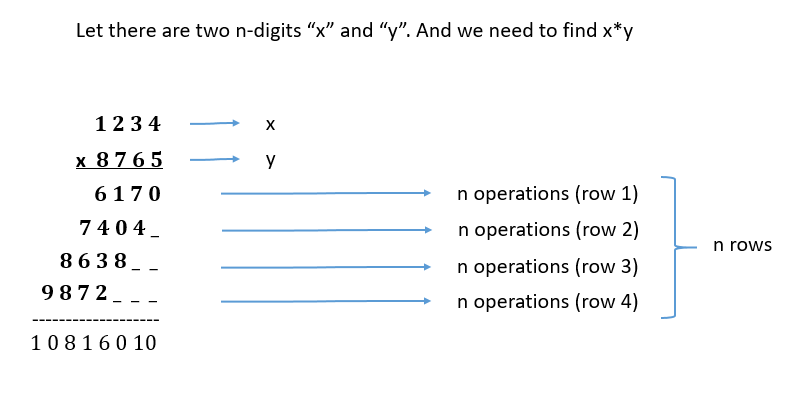


### **<font style="color:rgb(191,170,0)">Implementing Naive Algorithm</font>**

In [7]:
def naive_multiplication(a, b):
    result = 0
    for i in range(1, b+1):
        result += a
    return result

# test the function
print(naive_multiplication(321, 545))  # should print 12
print(naive_multiplication(5, 5))  # should print 25
print(naive_multiplication(2, 7))  # should print 14


174945
25
14


### **<font style="color:rgb(191,170,0)">Time Complexity of Naive Algorithm</font>**

<font style="color:rgb(0,0,0)">

Note that this is not the most efficient way to multiply two numbers, as it has a time complexity of O(n), where n is the value of y.

However, the function also uses the addition operation, which has a time complexity of O(n). Since the function is using both a loop and the addition operation, the overall time complexity is O(n^2).

In [8]:
import time

start = time.time()
result = naive_multiplication(10000032300000,100323000)
end = time.time()

print(f"Multiplication Result: {result}")
print('Time taken for ' +  str((end - start))
 + ' seconds')


Multiplication Result: 1003233240432900000000
Time taken for 8.632903575897217 seconds


### **<font style="color:rgb(191,170,0)">Pseudo Code of Karatsuba Algorithm for Large Integer Multiplication</font>**

### **<font style="color:rgb(191,170,0)">Time Complexity of Karatsuba Algorithm</font>**

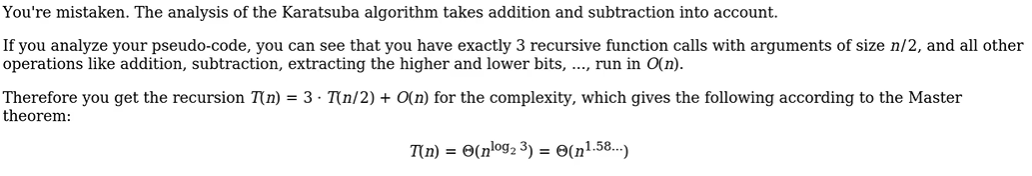
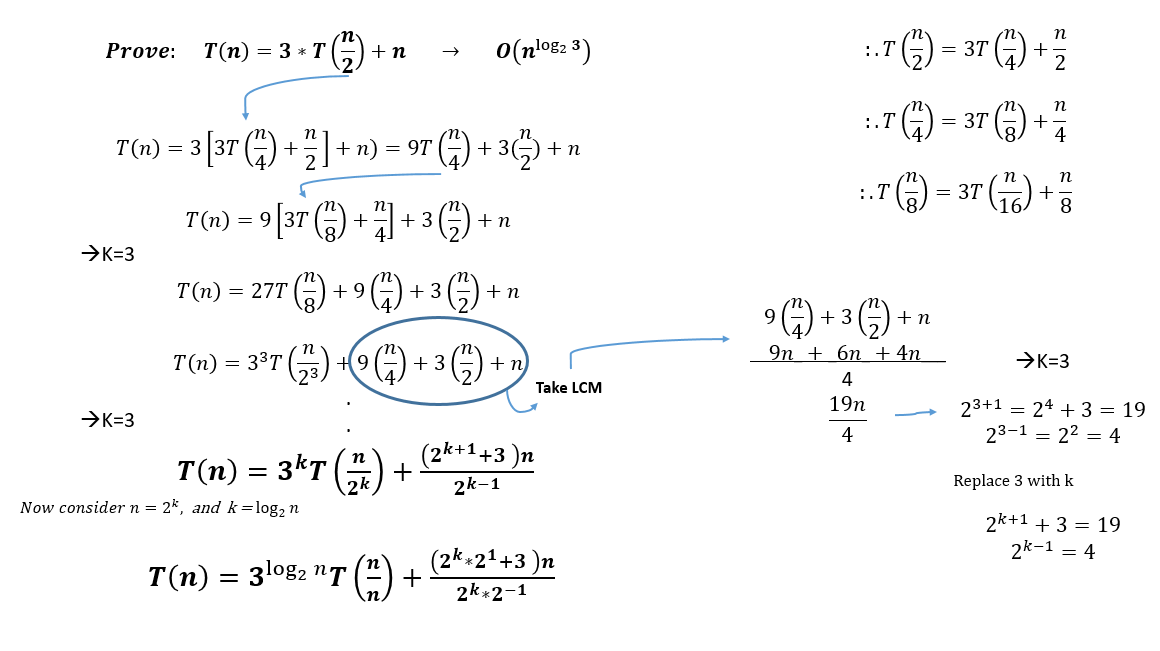
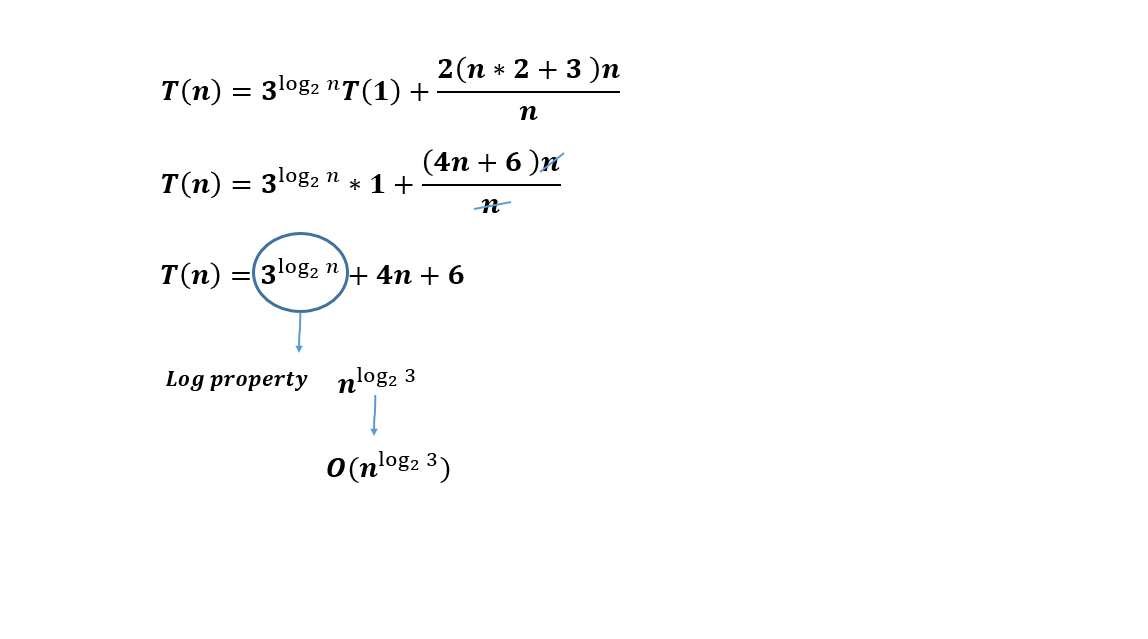

In [ ]:
print("Karatsuba")

In [1]:
def karatsuba_multiplication(x, y):
    # convert x and y to strings and store their lengths
    n = max(len(str(x)), len(str(y)))
    
    # base case: if n is 1, return x * y
    if n == 1:
        return x * y
    
    # split x and y into their high and low halves
    x1, x0 = divmod(x, 10**(n//2))
    y1, y0 = divmod(y, 10**(n//2))
    
    # recursively compute z0, z1, and z2
    z0 = karatsuba_multiplication(x0, y0)
    z1 = karatsuba_multiplication(x1, y1)
    z2 = karatsuba_multiplication((x1 + x0), (y1 + y0))
    
    # return the result using the Karatsuba identity
    return z1 * 10**(2*(n//2)) + (z2 - z1 - z0) * 10**(n//2) + z0

# test the function





In [ ]:
print(karatsuba_multiplication(151513, 54545454))  # should print 12
print(karatsuba_multiplication(5, 5))  # should print 25
print(karatsuba_multiplication(2, 7))  # should print 14

In [6]:
import time

start = time.time()
result = karatsuba_multiplication(10000032300000,100323000)
end = time.time()
print(start, end)
ss = end - start
print(f"Multiplication Result: {result}")
print('Time taken for ' +  str(ss)
 + ' seconds')

1672824036.4620974 1672824036.4631112
Multiplication Result: 1003233240432900000000
Time taken for 0.0010137557983398438 seconds
